# Advertisement Project 

## Problem
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

## Understanding the Data
This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# to allow the output of plotting commands to be displayed inline
%matplotlib inline
# to allow for faster tab autocomplete usage
%config Completer.use_jedi = False

# set global styling
sns.set_style('whitegrid')
sns.set_palette('YlGnBu_r', 3)

ad_data = pd.read_csv('advertising.csv')

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


There are 1000 rows of data and 10 columns. There are no null values.

In [3]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
# describe non-numeric columns
ad_data.describe(include=np.object)

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Future-proofed fresh-thinking conglomeration,Williamsport,Czech Republic,2016-03-18 02:39:26
freq,1,3,9,1


In [5]:
# find unique values for country
ad_data['Country'].value_counts()

Czech Republic           9
France                   9
Turkey                   8
Senegal                  8
Greece                   8
                        ..
Kiribati                 1
Lesotho                  1
Romania                  1
Saint Kitts and Nevis    1
Cape Verde               1
Name: Country, Length: 237, dtype: int64

The cities are almost unique and when looking further into Country, there are very few duplicate cities in order for it to have a strong correlation to whether an ad was clicked so I will remove these features later on.

## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Age')

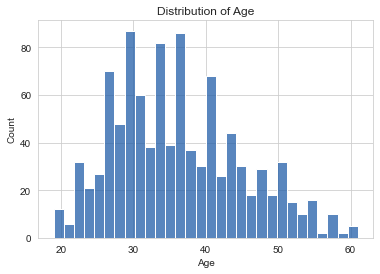

In [6]:
sns.histplot(ad_data['Age'], bins=30)
plt.title('Distribution of Age')

The age looks to be normally distributed around 30 to 35.

Text(0.5, 1.03, 'Area Income vs. Age')

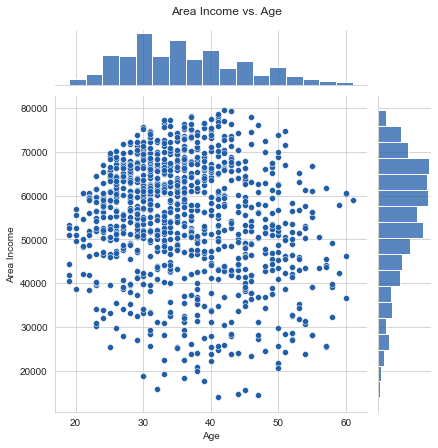

In [7]:
p = sns.jointplot(data=ad_data, x='Age', y='Area Income')
p.fig.suptitle('Area Income vs. Age', y=1.03)

There is cluster around the 25 to 35 age group and the 50k to 75k area income before it starts teetering off.

Text(0.5, 1.03, 'Daily Time Spent on Site vs. Age')

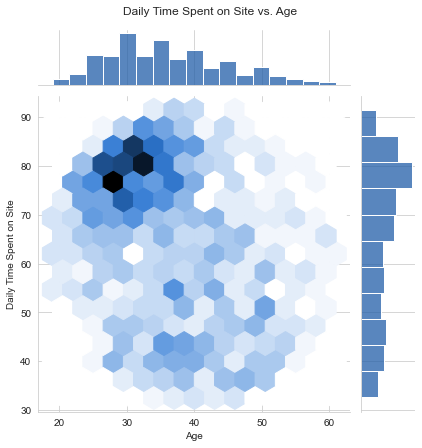

In [8]:
p = sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='hex')
p.fig.suptitle('Daily Time Spent on Site vs. Age', y=1.03)

In the 25 to 35 age group here, there is high density around 80 minutes for Daily Time Spent on Site.

Text(0.5, 1.03, 'Daily Time Spent on Site vs. Daily Internet Usage')

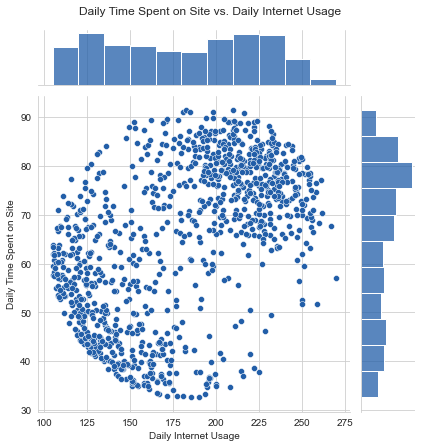

In [9]:
p = sns.jointplot(data=ad_data, x='Daily Internet Usage', y='Daily Time Spent on Site')
p.fig.suptitle('Daily Time Spent on Site vs. Daily Internet Usage', y=1.03)
#two clusters

There are two distinct clusters here where the less internet usage correlates to less daily time spent on site and the opposite where more internet usage correlates to more daily time spent on site with some separation in the moderate values.

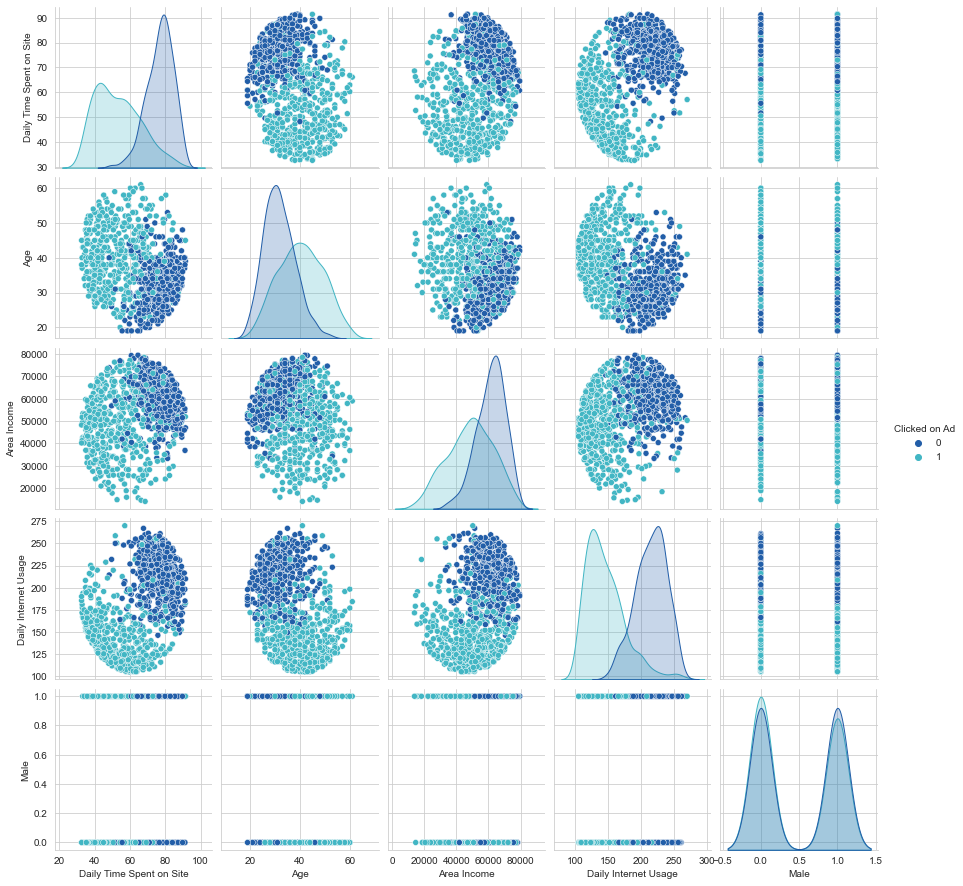

In [10]:
sns.pairplot(ad_data, hue='Clicked on Ad')

Text(0.5, 1.0, 'Count of Clicked on Ad by Gender')

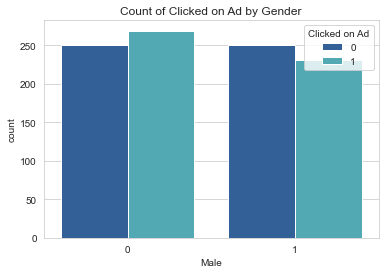

In [11]:
sns.countplot(data=ad_data, x='Male', hue='Clicked on Ad')
plt.title('Count of Clicked on Ad by Gender')

In the above pairplot, we can see that most of the numerical features, aside from Male are generally separated into two cluster of whether Clicked on Ad is True or False. Based on gender alone, it is near 50:50 on whether or not the ads were clicked.

## Model Training

In [12]:
# define the features used to build model (X) and the category to predict (Y)
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [13]:
# perform a train-test split with 2/3 vs 1/3 of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
# fit training data to logistic regression model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Model Testing

In [15]:
# predicting Clicked on Ad based on test features
predictions = logmodel.predict(X_test)

## Model Evaluation

In [16]:
accuracy = round(logmodel.score(X_train, y_train) * 100, 2)
print ('The accuracy of this model is calculated to be',str(accuracy) + '%.')

The accuracy of this model is calculated to be 95.82%.


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



Text(0.5, 1.0, 'Confusion Matrix')

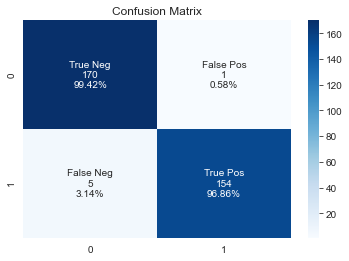

In [18]:
cnf_matrix = confusion_matrix(y_test, predictions)

# confusion matrix in percentages
cnf_percent = np.concatenate((cnf_matrix[0]/np.sum(cnf_matrix[0]), cnf_matrix[1]/np.sum(cnf_matrix[1])))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_percent]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')